# XGBoost

Load in Data

In [1]:
import pandas as pd
%config InlineBackend.figure_formats = ['svg']

In [2]:
df_train = pd.read_pickle("training_data_final_v3.pkl")
df_train.head()

,ID,orange_ping,orange_pos_x,orange_pos_y,orange_pos_z,orange_vel_x,orange_vel_y,orange_vel_z,orange_ang_vel_x,orange_ang_vel_y,...,orange_possesion,ball_dist_to_orange_goal,ball_dist_to_blue_goal,blue_dead,orange_dead,blue_dist_to_ball,blue_behind_ball,orange_dist_to_ball,orange_behind_ball,game_next_goal
0,116,14.0,255.929993,3839.489990,17.01,-65.700002,-412.400017,0.8,-0.2,1.3,...,False,5125.041181,5125.041181,False,False,3848.730157,True,3848.755458,True,1.0
1,117,14.0,255.929993,3839.489990,17.01,-65.700002,-412.400017,0.8,-0.2,1.3,...,False,5125.041181,5125.041181,False,False,3848.730157,True,3848.755458,True,1.0
2,118,14.0,253.520004,3827.120117,17.01,-487.900009,-2336.399994,0.0,-0.3,1.1,...,False,5125.041181,5125.041181,False,False,3835.681692,True,3836.255442,True,1.0
3,119,14.0,253.520004,3827.120117,17.01,-487.900009,-2336.399994,0.0,-0.3,1.1,...,False,5125.041181,5125.041181,False,False,3835.681692,True,3836.255442,True,1.0
4,120,14.0,248.229996,3799.129883,17.01,-665.999985,-4195.700073,-0.3,-0.8,-4.3,...,False,5125.041181,5125.041181,False,False,3806.720581,True,3807.983854,True,1.0


In [3]:
import xgboost as xgb

In [4]:
X = df_train[["blue_ping", 
              "blue_pos_x", 
              "blue_pos_y", 
              "blue_pos_z", 
              "blue_vel_x", 
              "blue_vel_y", 
              "blue_vel_z", 
              "blue_ang_vel_x", 
              "blue_ang_vel_y", 
              "blue_ang_vel_z", 
              "blue_rot_x", 
              "blue_rot_y", 
              "blue_rot_z", 
              "blue_jump_active", 
              "blue_dodge_active", 
              "blue_boost", 
              "blue_possesion", 
              "blue_dist_to_ball", 
              "blue_behind_ball", 
              "blue_dead", 
              "orange_ping", 
              "orange_pos_x", 
              "orange_pos_y", 
              "orange_pos_z", 
              "orange_vel_x", 
              "orange_vel_y", 
              "orange_vel_z", 
              "orange_ang_vel_x", 
              "orange_ang_vel_y", 
              "orange_ang_vel_z", 
              "orange_rot_x", 
              "orange_rot_y", 
              "orange_rot_z", 
              "orange_jump_active", 
              "orange_dodge_active", 
              "orange_boost", 
              "orange_possesion", 
              "orange_dist_to_ball", 
              "orange_behind_ball", 
              "orange_dead", 
              "ball_pos_x", 
              "ball_pos_y", 
              "ball_pos_z", 
              "ball_vel_x", 
              "ball_vel_y", 
              "ball_vel_z", 
              "ball_ang_vel_x", 
              "ball_ang_vel_y", 
              "ball_ang_vel_z", 
              "ball_dist_to_blue_goal", 
              "ball_dist_to_orange_goal"]].copy()
X.head()

,blue_ping,blue_pos_x,blue_pos_y,blue_pos_z,blue_vel_x,blue_vel_y,blue_vel_z,blue_ang_vel_x,blue_ang_vel_y,blue_ang_vel_z,...,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,ball_ang_vel_x,ball_ang_vel_y,ball_ang_vel_z,ball_dist_to_blue_goal,ball_dist_to_orange_goal
0,11.0,-256.000000,-3839.459961,17.01,0.000000,430.000000,0.8,0.6,0.0,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181
1,11.0,-256.000000,-3839.459961,17.01,0.000000,430.000000,0.8,0.6,0.0,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181
2,11.0,-256.000000,-3826.379883,17.01,0.000000,2472.299957,0.0,0.6,0.0,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181
3,11.0,-256.000000,-3826.379883,17.01,0.000000,2472.299957,0.0,0.6,0.0,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181
4,11.0,-254.630005,-3797.439941,17.01,457.999992,4215.899963,0.1,-0.1,-3.7,-1152.5,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181


In [5]:
y = df_train["game_next_goal"].copy()
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: game_next_goal, dtype: float64

In [6]:
df_test = pd.read_pickle("testing_data_final_v3.pkl")

In [7]:
X_test = df_test[["blue_ping", 
                  "blue_pos_x", 
                  "blue_pos_y", 
                  "blue_pos_z", 
                  "blue_vel_x", 
                  "blue_vel_y", 
                  "blue_vel_z", 
                  "blue_ang_vel_x", 
                  "blue_ang_vel_y", 
                  "blue_ang_vel_z", 
                  "blue_rot_x", 
                  "blue_rot_y", 
                  "blue_rot_z", 
                  "blue_jump_active", 
                  "blue_dodge_active", 
                  "blue_boost", 
                  "blue_possesion", 
                  "blue_dist_to_ball", 
                  "blue_behind_ball", 
                  "blue_dead", 
                  "orange_ping", 
                  "orange_pos_x", 
                  "orange_pos_y", 
                  "orange_pos_z", 
                  "orange_vel_x", 
                  "orange_vel_y", 
                  "orange_vel_z", 
                  "orange_ang_vel_x", 
                  "orange_ang_vel_y", 
                  "orange_ang_vel_z", 
                  "orange_rot_x", 
                  "orange_rot_y", 
                  "orange_rot_z", 
                  "orange_jump_active", 
                  "orange_dodge_active", 
                  "orange_boost", 
                  "orange_possesion", 
                  "orange_dist_to_ball", 
                  "orange_behind_ball", 
                  "orange_dead", 
                  "ball_pos_x", 
                  "ball_pos_y", 
                  "ball_pos_z", 
                  "ball_vel_x", 
                  "ball_vel_y", 
                  "ball_vel_z", 
                  "ball_ang_vel_x", 
                  "ball_ang_vel_y", 
                  "ball_ang_vel_z", 
                  "ball_dist_to_blue_goal", 
                  "ball_dist_to_orange_goal"]].copy()

X_test.head()

,blue_ping,blue_pos_x,blue_pos_y,blue_pos_z,blue_vel_x,blue_vel_y,blue_vel_z,blue_ang_vel_x,blue_ang_vel_y,blue_ang_vel_z,...,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,ball_ang_vel_x,ball_ang_vel_y,ball_ang_vel_z,ball_dist_to_blue_goal,ball_dist_to_orange_goal
0,26.0,2047.619995,-2559.620117,17.01,-304.099998,304.099998,0.8,0.4,0.6,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181
1,26.0,2047.619995,-2559.620117,17.01,-304.099998,304.099998,0.8,0.4,0.6,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181
2,26.0,2047.619995,-2559.620117,17.01,-304.099998,304.099998,0.8,0.4,0.6,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181
3,26.0,2038.369995,-2550.370117,17.01,-1748.200073,1748.200073,0.0,0.4,0.2,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181
4,26.0,2038.369995,-2550.370117,17.01,-1748.200073,1748.200073,0.0,0.4,0.2,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181


In [8]:
y_test = df_test["game_next_goal"].copy()
y_test.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: game_next_goal, dtype: float64

### Build Model

In [9]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', seed = 123, n_estimators = 500)

clf_xgb.fit(X, y, verbose = True, early_stopping_rounds = 10, eval_metric = "logloss", eval_set = [(X_test, y_test)])

C:\Users\mhugh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.67659
[1]	validation_0-logloss:0.67365
[2]	validation_0-logloss:0.66833
[3]	validation_0-logloss:0.66330
[4]	validation_0-logloss:0.66111
[5]	validation_0-logloss:0.66200
[6]	validation_0-logloss:0.66263
[7]	validation_0-logloss:0.66373
[8]	validation_0-logloss:0.66353
[9]	validation_0-logloss:0.66342
[10]	validation_0-logloss:0.66831
[11]	validation_0-logloss:0.66707
[12]	validation_0-logloss:0.66972
[13]	validation_0-logloss:0.67114


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

### Evaluate Model

Accuracy on training data

In [10]:
clf_xgb.score(X, y)

0.6838904930548283

Accuracy on testing data (used as `eval_set`)

In [11]:
clf_xgb.score(X_test, y_test)

0.586129008816975

Accuracy on 20 unseen games

In [12]:
df_accuracy = pd.read_pickle("accuracy_data_final_v3.pkl")
df_accuracy.head()

,ID,orange_ping,orange_pos_x,orange_pos_y,orange_pos_z,orange_vel_x,orange_vel_y,orange_vel_z,orange_ang_vel_x,orange_ang_vel_y,...,orange_possesion,ball_dist_to_orange_goal,ball_dist_to_blue_goal,blue_dead,orange_dead,blue_dist_to_ball,blue_behind_ball,orange_dist_to_ball,orange_behind_ball,game_next_goal
0,119,5.0,-2047.619995,2559.620117,17.01,304.099998,-304.099998,0.8,-0.4,-0.6,...,False,5125.041181,5125.041181,False,False,3278.740280,True,3278.740280,True,0.0
1,120,5.0,-2047.619995,2559.620117,17.01,304.099998,-304.099998,0.8,-0.4,-0.6,...,False,5125.041181,5125.041181,False,False,3278.740280,True,3278.740280,True,0.0
2,121,5.0,-2036.800049,2548.800049,17.01,1885.899963,-1885.899963,0.0,-0.3,-0.1,...,False,5125.041181,5125.041181,False,False,3263.536603,True,3263.536603,True,0.0
3,122,5.0,-2036.800049,2548.800049,17.01,1885.899963,-1885.899963,0.0,-0.3,-0.1,...,False,5125.041181,5125.041181,False,False,3263.536603,True,3263.536603,True,0.0
4,123,5.0,-2014.979980,2526.979980,17.01,3199.400024,-3199.400024,0.0,-0.2,0.0,...,False,5125.041181,5125.041181,False,False,3232.879085,True,3232.879085,True,0.0


In [13]:
X_accuracy = df_accuracy[["blue_ping", 
                          "blue_pos_x", 
                          "blue_pos_y", 
                          "blue_pos_z", 
                          "blue_vel_x", 
                          "blue_vel_y", 
                          "blue_vel_z", 
                          "blue_ang_vel_x", 
                          "blue_ang_vel_y", 
                          "blue_ang_vel_z", 
                          "blue_rot_x", 
                          "blue_rot_y", 
                          "blue_rot_z", 
                          "blue_jump_active", 
                          "blue_dodge_active", 
                          "blue_boost", 
                          "blue_possesion", 
                          "blue_dist_to_ball", 
                          "blue_behind_ball", 
                          "blue_dead", 
                          "orange_ping", 
                          "orange_pos_x", 
                          "orange_pos_y", 
                          "orange_pos_z", 
                          "orange_vel_x", 
                          "orange_vel_y", 
                          "orange_vel_z", 
                          "orange_ang_vel_x", 
                          "orange_ang_vel_y", 
                          "orange_ang_vel_z", 
                          "orange_rot_x", 
                          "orange_rot_y", 
                          "orange_rot_z", 
                          "orange_jump_active", 
                          "orange_dodge_active", 
                          "orange_boost", 
                          "orange_possesion", 
                          "orange_dist_to_ball", 
                          "orange_behind_ball", 
                          "orange_dead", 
                          "ball_pos_x", 
                          "ball_pos_y", 
                          "ball_pos_z", 
                          "ball_vel_x", 
                          "ball_vel_y", 
                          "ball_vel_z", 
                          "ball_ang_vel_x", 
                          "ball_ang_vel_y", 
                          "ball_ang_vel_z", 
                          "ball_dist_to_blue_goal", 
                          "ball_dist_to_orange_goal"]].copy()
X_accuracy.head()

,blue_ping,blue_pos_x,blue_pos_y,blue_pos_z,blue_vel_x,blue_vel_y,blue_vel_z,blue_ang_vel_x,blue_ang_vel_y,blue_ang_vel_z,...,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,ball_ang_vel_x,ball_ang_vel_y,ball_ang_vel_z,ball_dist_to_blue_goal,ball_dist_to_orange_goal
0,4.0,2047.619995,-2559.620117,17.01,-304.099998,304.099998,0.8,0.2,0.5,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181
1,4.0,2047.619995,-2559.620117,17.01,-304.099998,304.099998,0.8,0.2,0.5,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181
2,4.0,2036.800049,-2548.800049,17.01,-1885.899963,1885.899963,0.0,0.2,0.2,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181
3,4.0,2036.800049,-2548.800049,17.01,-1885.899963,1885.899963,0.0,0.2,0.2,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181
4,4.0,2014.979980,-2526.979980,17.01,-3199.400024,3199.400024,0.0,0.0,0.0,0.0,...,0.0,92.739998,0.0,0.0,0.0,0.0,0.0,0.0,5125.041181,5125.041181


In [14]:
y_accuracy = df_accuracy["game_next_goal"].copy()
y_accuracy.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: game_next_goal, dtype: float64

In [15]:
clf_xgb.score(X_accuracy, y_accuracy)

0.5663421182101446

Create confusion matrix

In [16]:
df_accuracy["prediction"] = clf_xgb.predict(X_accuracy)

In [17]:
cm = pd.crosstab(df_accuracy['game_next_goal'], df_accuracy['prediction'],
                 rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,0.0,1.0
Actual,,
0.0,50319,34602
1.0,36795,42923


Get logloss on 20 unseen games

In [19]:
df_accuracy["prediction_prob"] = clf_xgb.predict_proba(X_accuracy)[:, 1]

In [20]:
from sklearn.metrics import log_loss

In [21]:
log_loss(df_accuracy["game_next_goal"], df_accuracy["prediction_prob"])

0.670842234814518

### Hyperparameter tuning

Because of the autocorrelation, normal cross validation will lead to overfitting. Therefore, only 20 specific games will be used as cross validation, and the other 60 games will be used for training. 

In [22]:
X.shape[0]

467879

In [23]:
X_test.shape[0]

165136

In [24]:
X_GSCV = X.append(X_test)
y_GSCV = y.append(y_test)

In [25]:
train_indices = [i for i in range(X.shape[0])]
test_indices = [i + X.shape[0] for i in range(X_test.shape[0])]
custom_cv = [(train_indices, test_indices)]

In [26]:
max_depth = [4, 6, 8]

eta = [0.05, 0.1, 0.3]

param_grid = {'max_depth': max_depth, 
              'eta': eta
             }
param_grid

{'max_depth': [4, 6, 8], 'eta': [0.05, 0.1, 0.3]}

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
clf_new = xgb.XGBClassifier(objective = 'binary:logistic', seed = 123, n_estimators = 75)

clf_GSCV = GridSearchCV(estimator = clf_new, 
                        param_grid = param_grid, 
                        cv = custom_cv, 
                        scoring = "neg_log_loss", 
                        verbose = 3)

In [29]:
clf_GSCV.fit(X_GSCV, y_GSCV, verbose = True, early_stopping_rounds = 5, eval_metric = "logloss", eval_set = [(X_test, y_test)])

Fitting 1 folds for each of 9 candidates, totalling 9 fits


C:\Users\mhugh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.69047
[1]	validation_0-logloss:0.68803
[2]	validation_0-logloss:0.68596
[3]	validation_0-logloss:0.68401
[4]	validation_0-logloss:0.68235
[5]	validation_0-logloss:0.68065
[6]	validation_0-logloss:0.67932
[7]	validation_0-logloss:0.67818
[8]	validation_0-logloss:0.67678
[9]	validation_0-logloss:0.67568
[10]	validation_0-logloss:0.67473
[11]	validation_0-logloss:0.67347
[12]	validation_0-logloss:0.67261
[13]	validation_0-logloss:0.67127
[14]	validation_0-logloss:0.67054
[15]	validation_0-logloss:0.66960
[16]	validation_0-logloss:0.66878
[17]	validation_0-logloss:0.66819
[18]	validation_0-logloss:0.66747
[19]	validation_0-logloss:0.66698
[20]	validation_0-logloss:0.66648
[21]	validation_0-logloss:0.66600
[22]	validation_0-logloss:0.66567
[23]	validation_0-logloss:0.66512
[24]	validation_0-logloss:0.66473
[25]	validation_0-logloss:0.66430
[26]	validation_0-logloss:0.66387
[27]	validation_0-logloss:0.66355
[28]	validation_0-logloss:0.66366
[29]	validation_0-loglos

C:\Users\mhugh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.68973
[1]	validation_0-logloss:0.68707
[2]	validation_0-logloss:0.68503
[3]	validation_0-logloss:0.68311
[4]	validation_0-logloss:0.68094
[5]	validation_0-logloss:0.67925
[6]	validation_0-logloss:0.67743
[7]	validation_0-logloss:0.67612
[8]	validation_0-logloss:0.67527
[9]	validation_0-logloss:0.67411
[10]	validation_0-logloss:0.67258
[11]	validation_0-logloss:0.67142
[12]	validation_0-logloss:0.66968
[13]	validation_0-logloss:0.66817
[14]	validation_0-logloss:0.66733
[15]	validation_0-logloss:0.66625
[16]	validation_0-logloss:0.66565
[17]	validation_0-logloss:0.66487
[18]	validation_0-logloss:0.66398
[19]	validation_0-logloss:0.66363
[20]	validation_0-logloss:0.66320
[21]	validation_0-logloss:0.66225
[22]	validation_0-logloss:0.66168
[23]	validation_0-logloss:0.66130
[24]	validation_0-logloss:0.66085
[25]	validation_0-logloss:0.66040
[26]	validation_0-logloss:0.65963
[27]	validation_0-logloss:0.65899
[28]	validation_0-logloss:0.65867
[29]	validation_0-loglos

C:\Users\mhugh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.69005
[1]	validation_0-logloss:0.68719
[2]	validation_0-logloss:0.68453
[3]	validation_0-logloss:0.68274
[4]	validation_0-logloss:0.68060
[5]	validation_0-logloss:0.67847
[6]	validation_0-logloss:0.67678
[7]	validation_0-logloss:0.67524
[8]	validation_0-logloss:0.67388
[9]	validation_0-logloss:0.67249
[10]	validation_0-logloss:0.67102
[11]	validation_0-logloss:0.66989
[12]	validation_0-logloss:0.66895
[13]	validation_0-logloss:0.66853
[14]	validation_0-logloss:0.66767
[15]	validation_0-logloss:0.66644
[16]	validation_0-logloss:0.66563
[17]	validation_0-logloss:0.66514
[18]	validation_0-logloss:0.66481
[19]	validation_0-logloss:0.66342
[20]	validation_0-logloss:0.66240
[21]	validation_0-logloss:0.66230
[22]	validation_0-logloss:0.66161
[23]	validation_0-logloss:0.66121
[24]	validation_0-logloss:0.66087
[25]	validation_0-logloss:0.66031
[26]	validation_0-logloss:0.65992
[27]	validation_0-logloss:0.65975
[28]	validation_0-logloss:0.65961
[29]	validation_0-loglos

C:\Users\mhugh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.68791
[1]	validation_0-logloss:0.68400
[2]	validation_0-logloss:0.68083
[3]	validation_0-logloss:0.67783
[4]	validation_0-logloss:0.67512
[5]	validation_0-logloss:0.67326
[6]	validation_0-logloss:0.67120
[7]	validation_0-logloss:0.66940
[8]	validation_0-logloss:0.66802
[9]	validation_0-logloss:0.66701
[10]	validation_0-logloss:0.66592
[11]	validation_0-logloss:0.66521
[12]	validation_0-logloss:0.66456
[13]	validation_0-logloss:0.66365
[14]	validation_0-logloss:0.66273
[15]	validation_0-logloss:0.66173
[16]	validation_0-logloss:0.66200
[17]	validation_0-logloss:0.66178
[18]	validation_0-logloss:0.66122
[19]	validation_0-logloss:0.66181
[20]	validation_0-logloss:0.66112
[21]	validation_0-logloss:0.66115
[22]	validation_0-logloss:0.66068
[23]	validation_0-logloss:0.66007
[24]	validation_0-logloss:0.65988
[25]	validation_0-logloss:0.65940
[26]	validation_0-logloss:0.65888
[27]	validation_0-logloss:0.65889
[28]	validation_0-logloss:0.65867
[29]	validation_0-loglos

C:\Users\mhugh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.68660
[1]	validation_0-logloss:0.68309
[2]	validation_0-logloss:0.67915
[3]	validation_0-logloss:0.67634
[4]	validation_0-logloss:0.67420
[5]	validation_0-logloss:0.67223
[6]	validation_0-logloss:0.66940
[7]	validation_0-logloss:0.66755
[8]	validation_0-logloss:0.66596
[9]	validation_0-logloss:0.66489
[10]	validation_0-logloss:0.66362
[11]	validation_0-logloss:0.66227
[12]	validation_0-logloss:0.66039
[13]	validation_0-logloss:0.65935
[14]	validation_0-logloss:0.65980
[15]	validation_0-logloss:0.65981
[16]	validation_0-logloss:0.65895
[17]	validation_0-logloss:0.65798
[18]	validation_0-logloss:0.65748
[19]	validation_0-logloss:0.65723
[20]	validation_0-logloss:0.65677
[21]	validation_0-logloss:0.65706
[22]	validation_0-logloss:0.65628
[23]	validation_0-logloss:0.65655
[24]	validation_0-logloss:0.65747
[25]	validation_0-logloss:0.65725
[26]	validation_0-logloss:0.65633
[27]	validation_0-logloss:0.65672
[CV 1/1] END .............eta=0.1, max_depth=6;, score=-0.

C:\Users\mhugh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.68736
[1]	validation_0-logloss:0.68236
[2]	validation_0-logloss:0.67880
[3]	validation_0-logloss:0.67601
[4]	validation_0-logloss:0.67402
[5]	validation_0-logloss:0.67124
[6]	validation_0-logloss:0.66988
[7]	validation_0-logloss:0.66890
[8]	validation_0-logloss:0.66804
[9]	validation_0-logloss:0.66699
[10]	validation_0-logloss:0.66646
[11]	validation_0-logloss:0.66599
[12]	validation_0-logloss:0.66540
[13]	validation_0-logloss:0.66424
[14]	validation_0-logloss:0.66344
[15]	validation_0-logloss:0.66328
[16]	validation_0-logloss:0.66353
[17]	validation_0-logloss:0.66453
[18]	validation_0-logloss:0.66349
[19]	validation_0-logloss:0.66313
[20]	validation_0-logloss:0.66328
[21]	validation_0-logloss:0.66426
[22]	validation_0-logloss:0.66435
[23]	validation_0-logloss:0.66399
[24]	validation_0-logloss:0.66556
[CV 1/1] END .............eta=0.1, max_depth=8;, score=-0.663 total time=  41.0s


C:\Users\mhugh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.67948
[1]	validation_0-logloss:0.67281
[2]	validation_0-logloss:0.66966
[3]	validation_0-logloss:0.66640
[4]	validation_0-logloss:0.66453
[5]	validation_0-logloss:0.66352
[6]	validation_0-logloss:0.66267
[7]	validation_0-logloss:0.65955
[8]	validation_0-logloss:0.65939
[9]	validation_0-logloss:0.66011
[10]	validation_0-logloss:0.65917
[11]	validation_0-logloss:0.65853
[12]	validation_0-logloss:0.65868
[13]	validation_0-logloss:0.65874
[14]	validation_0-logloss:0.66156
[15]	validation_0-logloss:0.66039
[16]	validation_0-logloss:0.66104
[CV 1/1] END .............eta=0.3, max_depth=4;, score=-0.659 total time=  16.2s


C:\Users\mhugh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.67659
[1]	validation_0-logloss:0.67365
[2]	validation_0-logloss:0.66833
[3]	validation_0-logloss:0.66330
[4]	validation_0-logloss:0.66111
[5]	validation_0-logloss:0.66200
[6]	validation_0-logloss:0.66263
[7]	validation_0-logloss:0.66373
[8]	validation_0-logloss:0.66353
[9]	validation_0-logloss:0.66342
[CV 1/1] END .............eta=0.3, max_depth=6;, score=-0.661 total time=  15.5s


C:\Users\mhugh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.68035
[1]	validation_0-logloss:0.67736
[2]	validation_0-logloss:0.67407
[3]	validation_0-logloss:0.67349
[4]	validation_0-logloss:0.67244
[5]	validation_0-logloss:0.67209
[6]	validation_0-logloss:0.67287
[7]	validation_0-logloss:0.67461
[8]	validation_0-logloss:0.67813
[9]	validation_0-logloss:0.68062
[CV 1/1] END .............eta=0.3, max_depth=8;, score=-0.672 total time=  19.7s


C:\Users\mhugh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.68770
[1]	validation_0-logloss:0.68211
[2]	validation_0-logloss:0.67717
[3]	validation_0-logloss:0.67276
[4]	validation_0-logloss:0.66855
[5]	validation_0-logloss:0.66485
[6]	validation_0-logloss:0.66101
[7]	validation_0-logloss:0.65789
[8]	validation_0-logloss:0.65472
[9]	validation_0-logloss:0.65196
[10]	validation_0-logloss:0.64959
[11]	validation_0-logloss:0.64682
[12]	validation_0-logloss:0.64438
[13]	validation_0-logloss:0.64217
[14]	validation_0-logloss:0.63981
[15]	validation_0-logloss:0.63734
[16]	validation_0-logloss:0.63524
[17]	validation_0-logloss:0.63307
[18]	validation_0-logloss:0.63104
[19]	validation_0-logloss:0.62927
[20]	validation_0-logloss:0.62708
[21]	validation_0-logloss:0.62531
[22]	validation_0-logloss:0.62341
[23]	validation_0-logloss:0.62155
[24]	validation_0-logloss:0.61996
[25]	validation_0-logloss:0.61846
[26]	validation_0-logloss:0.61697
[27]	validation_0-logloss:0.61558
[28]	validation_0-logloss:0.61379
[29]	validation_0-loglos

GridSearchCV(cv=[([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                   18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, ...],
                  [467879, 467880, 467881, 467882, 467883, 467884, 467885,
                   467886, 467887, 467888, 467889, 467890, 467891, 467892,
                   467893, 467894, 467895, 467896, 467897, 467898, 467899,
                   467900, 467901, 467902, 467903, 467904, 467905, 467906,
                   467907, 467908, ...])],
             estimator=XGBClassifier(base...
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=75, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [30]:
clf_GSCV.best_params_

{'eta': 0.05, 'max_depth': 6}

In [32]:
df_params = pd.DataFrame(clf_GSCV.cv_results_)
df_params = df_params[["mean_fit_time", "param_eta", "param_max_depth", "mean_test_score", "rank_test_score"]]
df_params.sort_values("rank_test_score", inplace = True)
df_params

,mean_fit_time,param_eta,param_max_depth,mean_test_score,rank_test_score
1,56.544979,0.05,6,-0.654314,1
2,71.999629,0.05,8,-0.655313,2
4,32.410759,0.1,6,-0.656276,3
3,36.579108,0.1,4,-0.657467,4
0,40.949910,0.05,4,-0.658164,5
6,15.531030,0.3,4,-0.658523,6
7,14.917869,0.3,6,-0.661112,7
5,40.073959,0.1,8,-0.663130,8
8,19.011811,0.3,8,-0.672096,9


Round 2

In [35]:
eta = [0.03, 0.04]

param_grid = {'eta': eta}

param_grid

{'eta': [0.03, 0.04]}

In [36]:
clf_new2 = xgb.XGBClassifier(objective = 'binary:logistic', max_depth = 6, seed = 123, n_estimators = 100)

clf_GSCV2 = GridSearchCV(estimator = clf_new2, 
                         param_grid = param_grid, 
                         cv = custom_cv, 
                         scoring = "neg_log_loss", 
                         verbose = 3)

clf_GSCV2.fit(X_GSCV, y_GSCV, verbose = True, early_stopping_rounds = 5, eval_metric = "logloss", eval_set = [(X_test, y_test)])

Fitting 1 folds for each of 2 candidates, totalling 2 fits


C:\Users\mhugh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.69111
[1]	validation_0-logloss:0.68935
[2]	validation_0-logloss:0.68780
[3]	validation_0-logloss:0.68635
[4]	validation_0-logloss:0.68516
[5]	validation_0-logloss:0.68383
[6]	validation_0-logloss:0.68279
[7]	validation_0-logloss:0.68146
[8]	validation_0-logloss:0.68043
[9]	validation_0-logloss:0.67921
[10]	validation_0-logloss:0.67841
[11]	validation_0-logloss:0.67785
[12]	validation_0-logloss:0.67679
[13]	validation_0-logloss:0.67603
[14]	validation_0-logloss:0.67518
[15]	validation_0-logloss:0.67438
[16]	validation_0-logloss:0.67385
[17]	validation_0-logloss:0.67287
[18]	validation_0-logloss:0.67210
[19]	validation_0-logloss:0.67127
[20]	validation_0-logloss:0.67051
[21]	validation_0-logloss:0.67008
[22]	validation_0-logloss:0.66921
[23]	validation_0-logloss:0.66882
[24]	validation_0-logloss:0.66810
[25]	validation_0-logloss:0.66748
[26]	validation_0-logloss:0.66712
[27]	validation_0-logloss:0.66648
[28]	validation_0-logloss:0.66599
[29]	validation_0-loglos

C:\Users\mhugh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.69042
[1]	validation_0-logloss:0.68821
[2]	validation_0-logloss:0.68644
[3]	validation_0-logloss:0.68464
[4]	validation_0-logloss:0.68322
[5]	validation_0-logloss:0.68147
[6]	validation_0-logloss:0.68007
[7]	validation_0-logloss:0.67856
[8]	validation_0-logloss:0.67740
[9]	validation_0-logloss:0.67668
[10]	validation_0-logloss:0.67553
[11]	validation_0-logloss:0.67470
[12]	validation_0-logloss:0.67328
[13]	validation_0-logloss:0.67233
[14]	validation_0-logloss:0.67169
[15]	validation_0-logloss:0.67071
[16]	validation_0-logloss:0.66929
[17]	validation_0-logloss:0.66819
[18]	validation_0-logloss:0.66756
[19]	validation_0-logloss:0.66677
[20]	validation_0-logloss:0.66623
[21]	validation_0-logloss:0.66565
[22]	validation_0-logloss:0.66492
[23]	validation_0-logloss:0.66482
[24]	validation_0-logloss:0.66438
[25]	validation_0-logloss:0.66351
[26]	validation_0-logloss:0.66311
[27]	validation_0-logloss:0.66263
[28]	validation_0-logloss:0.66219
[29]	validation_0-loglos

C:\Users\mhugh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.68877
[1]	validation_0-logloss:0.68427
[2]	validation_0-logloss:0.68007
[3]	validation_0-logloss:0.67630
[4]	validation_0-logloss:0.67287
[5]	validation_0-logloss:0.66962
[6]	validation_0-logloss:0.66656
[7]	validation_0-logloss:0.66324
[8]	validation_0-logloss:0.66060
[9]	validation_0-logloss:0.65814
[10]	validation_0-logloss:0.65558
[11]	validation_0-logloss:0.65298
[12]	validation_0-logloss:0.65086
[13]	validation_0-logloss:0.64861
[14]	validation_0-logloss:0.64637
[15]	validation_0-logloss:0.64442
[16]	validation_0-logloss:0.64259
[17]	validation_0-logloss:0.64058
[18]	validation_0-logloss:0.63883
[19]	validation_0-logloss:0.63723
[20]	validation_0-logloss:0.63524
[21]	validation_0-logloss:0.63375
[22]	validation_0-logloss:0.63207
[23]	validation_0-logloss:0.63038
[24]	validation_0-logloss:0.62876
[25]	validation_0-logloss:0.62735
[26]	validation_0-logloss:0.62605
[27]	validation_0-logloss:0.62459
[28]	validation_0-logloss:0.62335
[29]	validation_0-loglos

GridSearchCV(cv=[([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                   18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, ...],
                  [467879, 467880, 467881, 467882, 467883, 467884, 467885,
                   467886, 467887, 467888, 467889, 467890, 467891, 467892,
                   467893, 467894, 467895, 467896, 467897, 467898, 467899,
                   467900, 467901, 467902, 467903, 467904, 467905, 467906,
                   467907, 467908, ...])],
             estimator=XGBClassifier(base...
                                     max_depth=6, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
              

In [37]:
clf_GSCV2.best_params_

{'eta': 0.04}

In [39]:
df_params2 = pd.DataFrame(clf_GSCV2.cv_results_)
df_params2 = df_params2[["mean_fit_time", "param_eta", "mean_test_score", "rank_test_score"]]
df_params2.sort_values("rank_test_score", inplace = True)
df_params2

,mean_fit_time,param_eta,mean_test_score,rank_test_score
1,70.938927,0.04,-0.653122,1
0,84.303716,0.03,-0.655644,2


Because `eta` of 0.04 scored better than 0.03 and 0.05, our grid search is complete. 

Build final model just to make sure no testing data leaked in while doing `GridSearchCV`

In [40]:
clf_final = xgb.XGBClassifier(objective = 'binary:logistic', seed = 123, 
                              n_estimators = 100, 
                              eta = 0.04, max_depth = 6)

clf_final.fit(X, y, verbose = True, early_stopping_rounds = 10, 
              eval_metric = "logloss", eval_set = [(X_test, y_test)])

C:\Users\mhugh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.69042
[1]	validation_0-logloss:0.68821
[2]	validation_0-logloss:0.68644
[3]	validation_0-logloss:0.68464
[4]	validation_0-logloss:0.68322
[5]	validation_0-logloss:0.68147
[6]	validation_0-logloss:0.68007
[7]	validation_0-logloss:0.67856
[8]	validation_0-logloss:0.67740
[9]	validation_0-logloss:0.67668
[10]	validation_0-logloss:0.67553
[11]	validation_0-logloss:0.67470
[12]	validation_0-logloss:0.67328
[13]	validation_0-logloss:0.67233
[14]	validation_0-logloss:0.67169
[15]	validation_0-logloss:0.67071
[16]	validation_0-logloss:0.66929
[17]	validation_0-logloss:0.66819
[18]	validation_0-logloss:0.66756
[19]	validation_0-logloss:0.66677
[20]	validation_0-logloss:0.66623
[21]	validation_0-logloss:0.66565
[22]	validation_0-logloss:0.66492
[23]	validation_0-logloss:0.66482
[24]	validation_0-logloss:0.66438
[25]	validation_0-logloss:0.66351
[26]	validation_0-logloss:0.66311
[27]	validation_0-logloss:0.66263
[28]	validation_0-logloss:0.66219
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.04, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.0399999991,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Prediction accuracy on training data

In [41]:
clf_final.score(X, y)

0.7135648319330425

Prediction accuracy on 20 unseen games

In [42]:
clf_final.score(X_accuracy, y_accuracy)

0.5843572907998712

Judging from the Random Forest Model's performance, I felt as if I could tweak the sample sizes and get a better result. 

In [139]:
clf_final2 = xgb.XGBClassifier(objective = 'binary:logistic', seed = 123, 
                               n_estimators = 500, subsample = 0.25, colsample_bytree = 0.375, min_child_weight = 10, 
                               eta = 0.04, max_depth = 12)

clf_final2.fit(X, y, verbose = True, early_stopping_rounds = 10, 
               eval_metric = "logloss", eval_set = [(X_test, y_test)])

C:\Users\mhugh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.69079
[1]	validation_0-logloss:0.68897
[2]	validation_0-logloss:0.68764
[3]	validation_0-logloss:0.68548
[4]	validation_0-logloss:0.68372
[5]	validation_0-logloss:0.68223
[6]	validation_0-logloss:0.68103
[7]	validation_0-logloss:0.67930
[8]	validation_0-logloss:0.67729
[9]	validation_0-logloss:0.67574
[10]	validation_0-logloss:0.67481
[11]	validation_0-logloss:0.67279
[12]	validation_0-logloss:0.67168
[13]	validation_0-logloss:0.67141
[14]	validation_0-logloss:0.67028
[15]	validation_0-logloss:0.67037
[16]	validation_0-logloss:0.66944
[17]	validation_0-logloss:0.66844
[18]	validation_0-logloss:0.66802
[19]	validation_0-logloss:0.66769
[20]	validation_0-logloss:0.66674
[21]	validation_0-logloss:0.66542
[22]	validation_0-logloss:0.66434
[23]	validation_0-logloss:0.66310
[24]	validation_0-logloss:0.66350
[25]	validation_0-logloss:0.66309
[26]	validation_0-logloss:0.66187
[27]	validation_0-logloss:0.66120
[28]	validation_0-logloss:0.66039
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.375,
              enable_categorical=False, eta=0.04, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.0399999991, max_delta_step=0, max_depth=12,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=123, subsample=0.25, tree_method='exact',
              validate_parameters=1, verbosity=None)

Accuracy on training data

In [140]:
clf_final2.score(X, y)

0.9079933059615841

Accuracy on 20 unseen games

In [141]:
clf_final2.score(X_accuracy, y_accuracy)

0.6023967589696244

Despite the overfitting on training data, we still see improvement overall in the model accuracy on unseen data. Therefore, we will advance with `clf_final2`. 

Confusion matrix

In [146]:
df_accuracy["prediction"] = clf_final2.predict(X_accuracy)
cm = pd.crosstab(df_accuracy['game_next_goal'], df_accuracy['prediction'],
                 rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,0.0,1.0
Actual,,
0.0,53787,31134
1.0,34327,45391


Log loss on 20 unseen games

<AxesSubplot:>

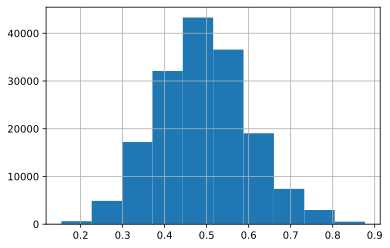

In [147]:
df_accuracy["prediction_prob"] = clf_final2.predict_proba(X_accuracy)[:, 1]
df_accuracy["prediction_prob"].hist()

In [148]:
log_loss(df_accuracy["game_next_goal"], df_accuracy["prediction_prob"])

0.6558224394148079

AUC on unseen games

In [149]:
from sklearn.metrics import roc_curve, auc

In [153]:
fpr, tpr, threshold = roc_curve(df_accuracy["game_next_goal"], df_accuracy["prediction"])

xgb_auc = auc(fpr, tpr)
xgb_auc

0.6013857596304785

Graph of ROC

In [154]:
import matplotlib.pyplot as plt

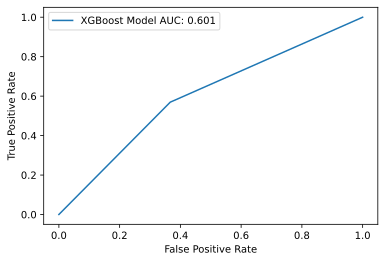

In [155]:
plt.plot(fpr, tpr, label = f"XGBoost Model AUC: {xgb_auc:.3f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

In [156]:
import pickle

In [157]:
pickle.dump(clf_final2, open("xgb_model2.model", "wb"))